In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

%matplotlib inline

In [21]:
df = pd.read_csv('data_/data.csv')
df = df.sort_values(by='date')
df.rename(columns={'close': 'y','date':'ds'}, inplace=True)
df['y'] = np.log(df['y'])
df.head()

,ds,open,high,y,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
1088,1994-03-25,20.50,22.48,2.734368,14.61,459992.0,0.00,0.00,15.400,15.400,15.400,459992.0,459992.0,459992.0,261.36
1087,1994-04-01,14.99,16.75,2.653242,13.78,191242.0,-1.20,-7.79,14.800,14.800,14.800,325617.0,325617.0,325617.0,108.66
1086,1994-04-08,14.58,14.60,2.497329,12.11,33060.0,-2.05,-14.44,13.917,13.917,13.917,228098.0,228098.0,228098.0,18.78
1085,1994-04-15,12.20,12.60,2.388763,9.81,61348.0,-1.25,-10.29,13.163,13.163,13.163,186410.5,186410.5,186410.5,34.86
1084,1994-04-22,10.91,11.23,2.270062,8.42,97481.0,-1.22,-11.19,12.466,12.466,12.466,168624.6,168624.6,168624.6,55.39


In [16]:
# fit the model

m = Prophet()
m.fit(df);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
E:\program\Anaconda3\envs\tensorflow\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [17]:
future = m.make_future_dataframe(periods=10)
future.tail()

,ds
1094,2017-05-23
1095,2017-05-24
1096,2017-05-25
1097,2017-05-26
1098,2017-05-27


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1094,2017-05-23,3.220021,2.898848,3.558375
1095,2017-05-24,3.123878,2.784126,3.463470
1096,2017-05-25,3.266043,2.926856,3.589631
1097,2017-05-26,3.165999,2.830018,3.502717
1098,2017-05-27,3.458238,3.094852,3.785209


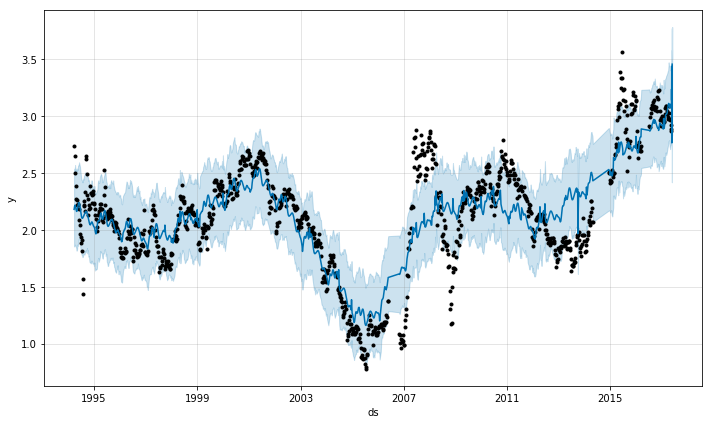

In [19]:
m.plot(forecast);

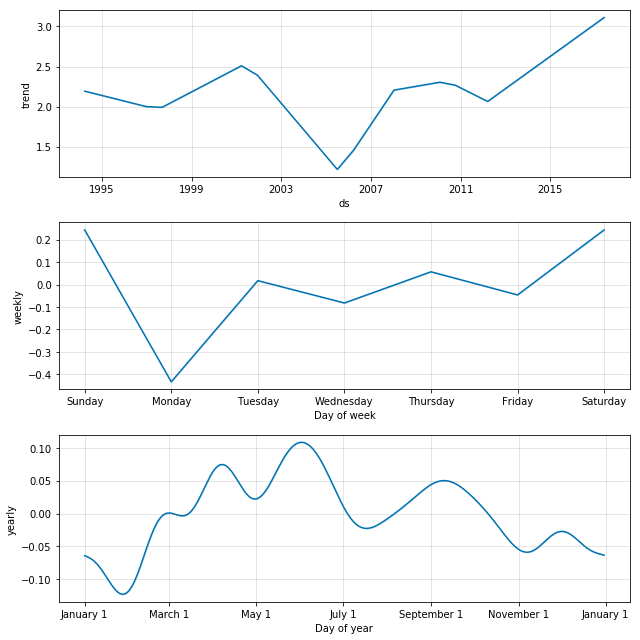

In [20]:
m.plot_components(forecast);